In [1]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from autocorrect import Speller
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ã_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [4]:
df=df[['v1','v2']]

In [5]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
df.rename(columns={
    'v1':'labels',
    'v2':'message'
},inplace=True)

In [7]:
df.tail()

,labels,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
df.labels.value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [9]:
spam=''.join(list(df[df['labels']=='spam']['message']))
spam=WordCloud(width=500,height=500).generate(spam)

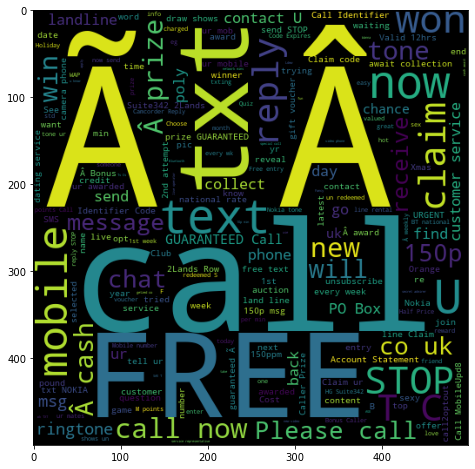

In [10]:
plt.figure(figsize=(10,8))
plt.imshow(spam)
plt.show()

In [11]:
spell=Speller()

In [12]:
data=[]
for i in tqdm(range(df.shape[0])):
    lines=df.iloc[i,1]
    lines=re.sub('[^A-za-z]', ' ',lines)
    lines=lines.lower()
    tokened_lines=word_tokenize(lines)
    processed=[]
    for j in tokened_lines:
        if j not in set(stopwords.words('english')):
            processed.append(spell(stemmer.stem(j)))
            
    final=' '.join(processed)
    data.append(final)

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [07:15<00:00, 12.79it/s]


In [13]:
df['labels']=df['labels'].apply(lambda x: 1 if x=='spam' else 0)

In [14]:
data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [15]:
x_train,x_test,y_train,y_test=train_test_split(data,df['labels'],test_size=0.2)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
matrix=CountVectorizer()
len(x_train),len(y_train)

(4457, 4457)

In [17]:
x_train_vect=matrix.fit_transform(x_train).toarray()
x_test_vect=matrix.transform(x_test).toarray()


In [18]:
x_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
model.fit(x_train_vect,y_train)

GaussianNB()

In [20]:
model.class_count_

array([3861.,  596.])

In [21]:
model.classes_

array([0, 1], dtype=int64)

In [22]:
y_p=model.predict(x_test_vect)

In [23]:
y_test

1314    0
187     1
3724    0
2860    0
5023    0
       ..
1489    0
5051    0
2643    0
2500    0
2213    0
Name: labels, Length: 1115, dtype: int64

In [24]:
y_p[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [25]:
accuracy_score(y_test,y_p)*100

85.73991031390135

In [26]:
confusion_matrix(y_test,y_p)

array([[824, 140],
       [ 19, 132]], dtype=int64)